# Homework 6

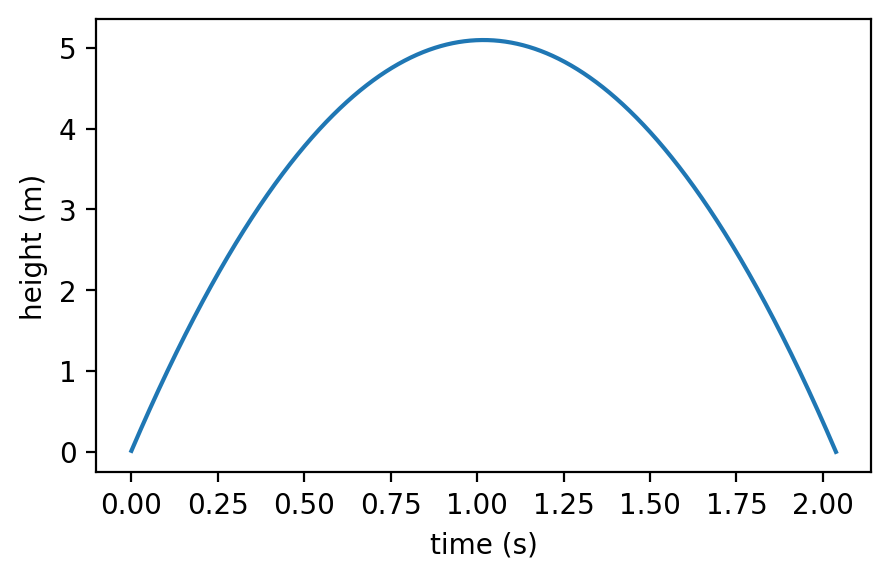

In [51]:
import numpy as np
import matplotlib.pyplot as plt

g=-9.81
tend=3
h=0.001
# Starting at 0 m
y=[0, 10]
t=0
#y[0] = y, y[1] = v_y
def f(t, y):
    f = np.zeros(2)
    f[0] = y[1]
    f[1] = g
    return f
    
def rk4(t, h, y):
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)# please finish this line
    y+=(1/6)*(k1+2*k2+2*k3+k4)# please finish this line
    return y

yp=[]
xp=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y)
    xp=np.append(xp,t)
    yp=np.append(yp,y[0])
    t = t+h
    if(y[0]<0):
        break
plt.figure(figsize = (5,3), dpi = 200)
plt.plot(xp,yp)
plt.ylabel('height (m)')
plt.xlabel('time (s)')
plt.show()

# Homework 7
## Bisection (Solve for y'(0))

In [46]:
def bisection(xmin, xmax, Nmax, eps_low, eps_up, f, target):
    for i in range(0,Nmax):
        x=(xmin+xmax)/2.
        if(f(x)<target):
            xmin = x# please finish this line (xmin=x or xmax=x???)
        else:
            xmax = x
             # please finish this line
        if(abs(f(x))>eps_low and abs(f(x))<eps_up):
            print(f"Root is at {x} after {i} iterations with a precision of {abs(f(x))}")
            break
        print(f"Root is at {x} after {i} iterations with a precision of {abs(f(x))}")
    return x

def f(t, y):
    f=np.zeros(2)
    f[0]=y[1]
    f[1]=(1/(1-t*t))*(2*t*y[1]-5.*(5.+1.)*y[0])
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

def y_prime_func(x):
    y=[0,x] # y[0] = y, y[1] = y'
    yp=[y[0]]
    ta=[0]
    t=0
    tend=0.99999
    h=1.e-4
    y=[0,x]
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = rk4(t,h,y,2)
        yp=np.append(yp, y[0])
        ta=np.append(ta, t)
        t = t+h

    return max(yp)
       
print('y_prime should be at:',bisection(0, 10, 100, 0.99, 1.01, y_prime_func, 1))

Root is at 5.0 after 0 iterations with a precision of 2.6662666807526874
Root is at 2.5 after 1 iterations with a precision of 1.3331333403763437
Root is at 1.25 after 2 iterations with a precision of 0.6665666701881718
Root is at 1.875 after 3 iterations with a precision of 0.9998500052822572
y_prime should be at: 1.875


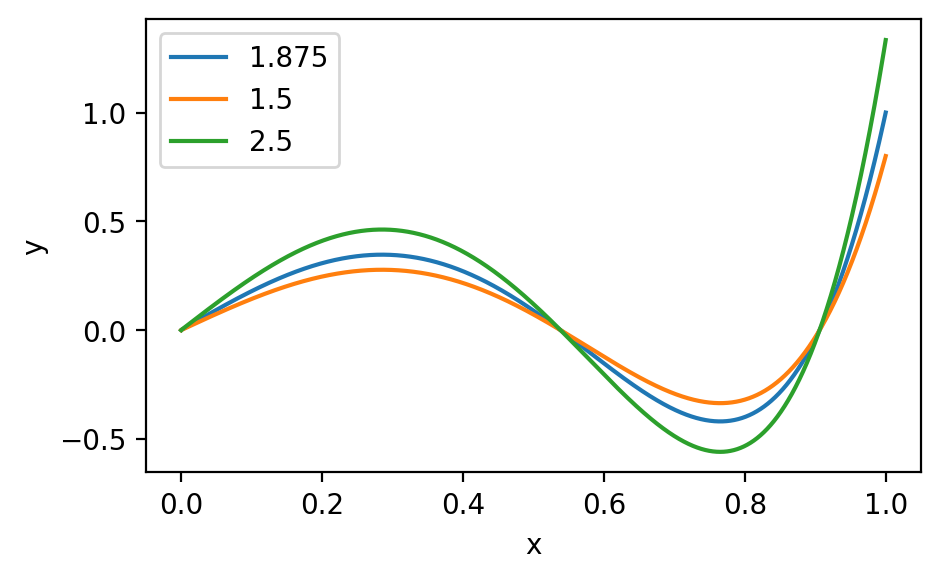

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    f=np.zeros(2)
    f[0]=y[1]
    f[1]=(1/(1-t*t))*(2*t*y[1]-5.*(5.+1.)*y[0])
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

y=[0,1.875] # y[0] = y, y[1] = y'
yp=[[y[0]], [y[0]], [y[0]]]
ta=[[0], [0], [0]]
t=0
tend=0.99999
h=1.e-4

y_primes = [1.875, 1.5, 2.5]
for i in range(0,3):
    y=[0,y_primes[i]]
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = rk4(t,h,y,2)
        yp[i].append(y[0])
        ta[i].append(t)
        t = t+h
    t=0
    h=1.e-4
        #print(t, y[1], y[0])
        
plt.figure(figsize = (5,3), dpi = 200)

for i,j,k in zip(ta, yp, y_primes):
    plt.plot(i, j, label = k)
    
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

plt.show()